# Exploratory data analysis

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Read all data-sets (raw data)

In [126]:
# most important columns in the cftc data-set as identified by Anant
cftc_imp_cols = ['2 As_of_Date_In_Form_YYMMDD', '1 Market_and_Exchange_Names', 
                 '3 As_of_Date_Form_MM/DD/YYYY', '8 Open_Interest_All', '9 Prod_Merc_Positions_Long_All', 
                 '10 Prod_Merc_Positions_Short_All', '11 Swap_Positions_Long_All',
                 '12 Swap__Positions_Short_All', '14 M_Money_Positions_Long_All', '15 M_Money_Positions_Short_All',
                 '56 56 Change_in_Open_Interest_All', '57 57 Change_in_Prod_Merc_Long_All', 
                 '58 58 Change_in_Prod_Merc_Short_All', '59 59 Change_in_Swap_Long_All',
                 '60 60 Change_in_Swap_Short_All', '62 62 Change_in_M_Money_Long_All',
                 '63 63 Change_in_M_Money_Short_All', '73 73 Pct_of_OI_Prod_Merc_Long_All',
                 '74 74 Pct_of_OI_Prod_Merc_Short_All', '75 75 Pct_of_OI_Swap_Long_All',
                 '76 76 Pct_of_OI_Swap_Short_All', '78 78 Pct_of_OI_M_Money_Long_All',
                 '79 79 Pct_of_OI_M_Money_Short_All', '120 120 Traders_Tot_All',
                 '121 121 Traders_Prod_Merc_Long_All', '122 122 Traders_Prod_Merc_Short_All',
                 '123 123 Traders_Swap_Long_All', '124 124 Traders_Swap_Short_All',
                 '126 126 Traders_M_Money_Long_All', '127 127 Traders_M_Money_Short_All']

# Note: best date column is '3 As_of_Date_Form_MM/DD/YYYY'

In [127]:
# features
df_cftc = pd.read_excel("CFTC_Data_Table_with_Column_Description.xlsx")
df_cftc = df_cftc[cftc_imp_cols]

# auctions (additional features, special events)
# Current Auction Historical Data 
df_adv_auct = pd.read_excel('WCI_Advance_Auction_Historical_Statistics.xlsx')
# current yrs vintage, aprox. 58 mio

# Advance Auction Historical Data 
df_cur_auct = pd.read_excel('WCI_Current_Auction_Historical_Statistics.xlsx')
# 3yrs ahead, smaller supply vol., 8 mio 

# Note: both auctions have same the rules for bidding
# columns of the Current Auction Historical Statistics would be matching 
# the Advance Auction Historical Statistics but only with the additional prefix ‘CA’ or ‘AA’ to denote the auction

# CCA daily Front, Benchmark and Auction Floor
# contains target: 'Front'
df_front = pd.read_excel('CCA_Historic_Front.xlsx')


####################################################################
# list with all dataframes
df_list = [df_cftc, df_adv_auct, df_cur_auct, df_front]

### Clean auctions data

In [128]:
def clean_characters(df, colname, characters):
    df[colname] = df[colname].astype(str)
    df[colname] = df[colname].map(lambda x: x.lstrip(characters))
    return df[colname].apply(pd.to_numeric)
    
    
df_adv_auct['AA_Cleared Above Floor'] = clean_characters(df_adv_auct, 'AA_Cleared Above Floor', '$-')
df_cur_auct['CA_Cleared Above Floor'] = clean_characters(df_cur_auct, 'CA_Cleared Above Floor', '$-')

df_adv_auct['AA_HHI'] = df_adv_auct['AA_HHI'].astype(float)
df_cur_auct['CA_HHI'] = df_cur_auct['CA_HHI'].astype(float)

## 2. Describe each data-set and find nulls

In [129]:
def describe_data(df, i):
    print('Dataframe list idx: ' + str(i), '\n')
    print('Shape: rows x columns: ', '\n', df.shape,'\n') 
    print(df.info(),'\n')
    print('Descriptive statistics: ', '\n', df.describe(),'\n')
    print('Number of nulls per column: ', '\n', df.isnull().sum(),'\n') # nulls in any column

#for i in range(len(df_list)):
#    describe_data(df_list[i], i)

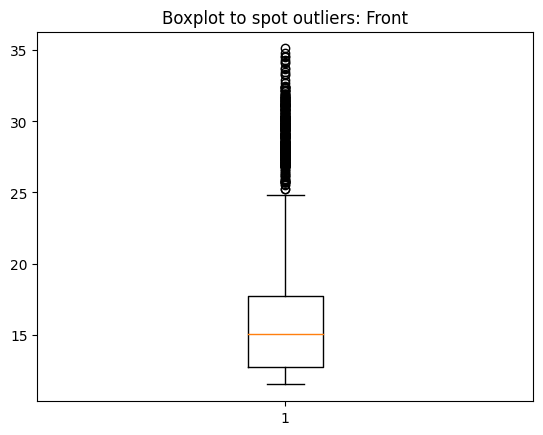

In [130]:
# boxplot to spot outliers
def plot_outliers(col, varname):
    y = list(col)
    plt.boxplot(y)
    plt.title('Boxplot to spot outliers: ' + varname)
    plt.show()

plot_outliers(df_front['Front'], 'Front') 


count    2495.000000
mean       16.951840
std         5.760219
min        11.490000
25%        12.720000
50%        15.020000
75%        17.715000
max        35.130000
Name: Front, dtype: float64


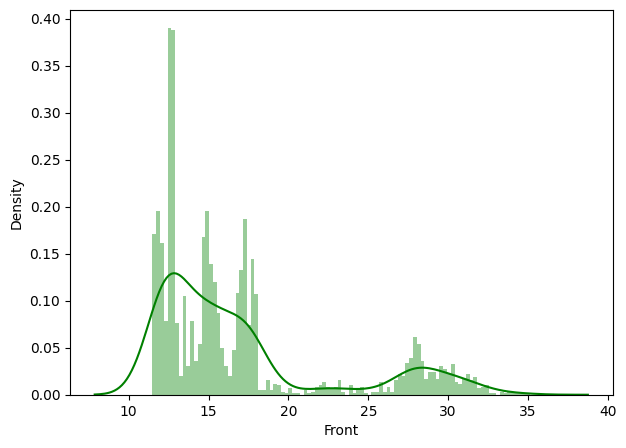

In [131]:
print(df_front['Front'].describe())
plt.figure(figsize=(7, 5))
sns.distplot(df_front['Front'], color='g', bins=100, hist_kws={'alpha': 0.4});

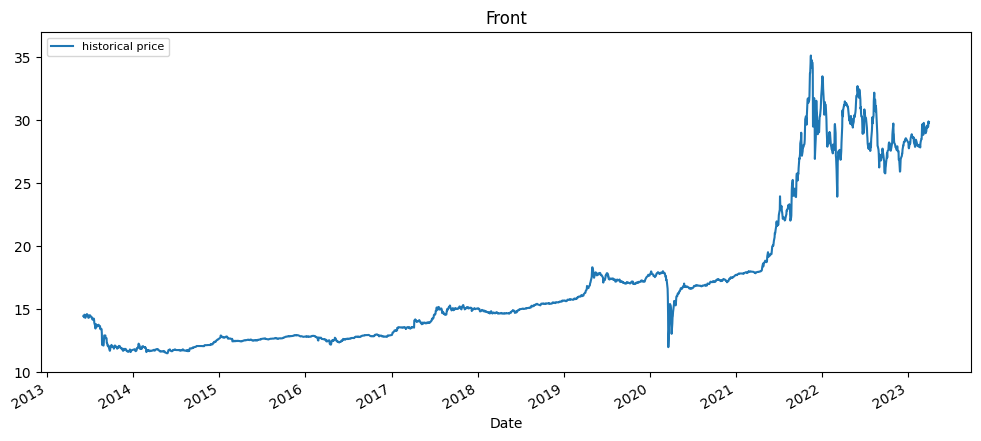

In [132]:
plt.figure(figsize=(12,5), dpi=100) 
df_front.set_index('Date')['Front'].plot(label='historical price')  
plt.title('Front')
plt.ylim([10, 37])
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 3. Data preparation of CFTC Data-set

In [133]:
# Missing values per column and data type
#for i in range(len(df_cftc.columns)):
#    nulls = df_cftc[df_cftc.columns[i]].isnull().sum()
#    if nulls > 0:
#        print('Col. name:', df_cftc.columns[i], ', Nr. of nulls:', nulls, ', Data type:', df_cftc[df_cftc.columns[i]].dtypes)
        

array([[<AxesSubplot: title={'center': '2 As_of_Date_In_Form_YYMMDD'}>,
        <AxesSubplot: title={'center': '8 Open_Interest_All'}>,
        <AxesSubplot: title={'center': '9 Prod_Merc_Positions_Long_All'}>,
        <AxesSubplot: title={'center': '10 Prod_Merc_Positions_Short_All'}>,
        <AxesSubplot: title={'center': '11 Swap_Positions_Long_All'}>],
       [<AxesSubplot: title={'center': '12 Swap__Positions_Short_All'}>,
        <AxesSubplot: title={'center': '14 M_Money_Positions_Long_All'}>,
        <AxesSubplot: title={'center': '15 M_Money_Positions_Short_All'}>,
        <AxesSubplot: title={'center': '56 56 Change_in_Open_Interest_All'}>,
        <AxesSubplot: title={'center': '57 57 Change_in_Prod_Merc_Long_All'}>],
       [<AxesSubplot: title={'center': '58 58 Change_in_Prod_Merc_Short_All'}>,
        <AxesSubplot: title={'center': '59 59 Change_in_Swap_Long_All'}>,
        <AxesSubplot: title={'center': '60 60 Change_in_Swap_Short_All'}>,
        <AxesSubplot: title={'c

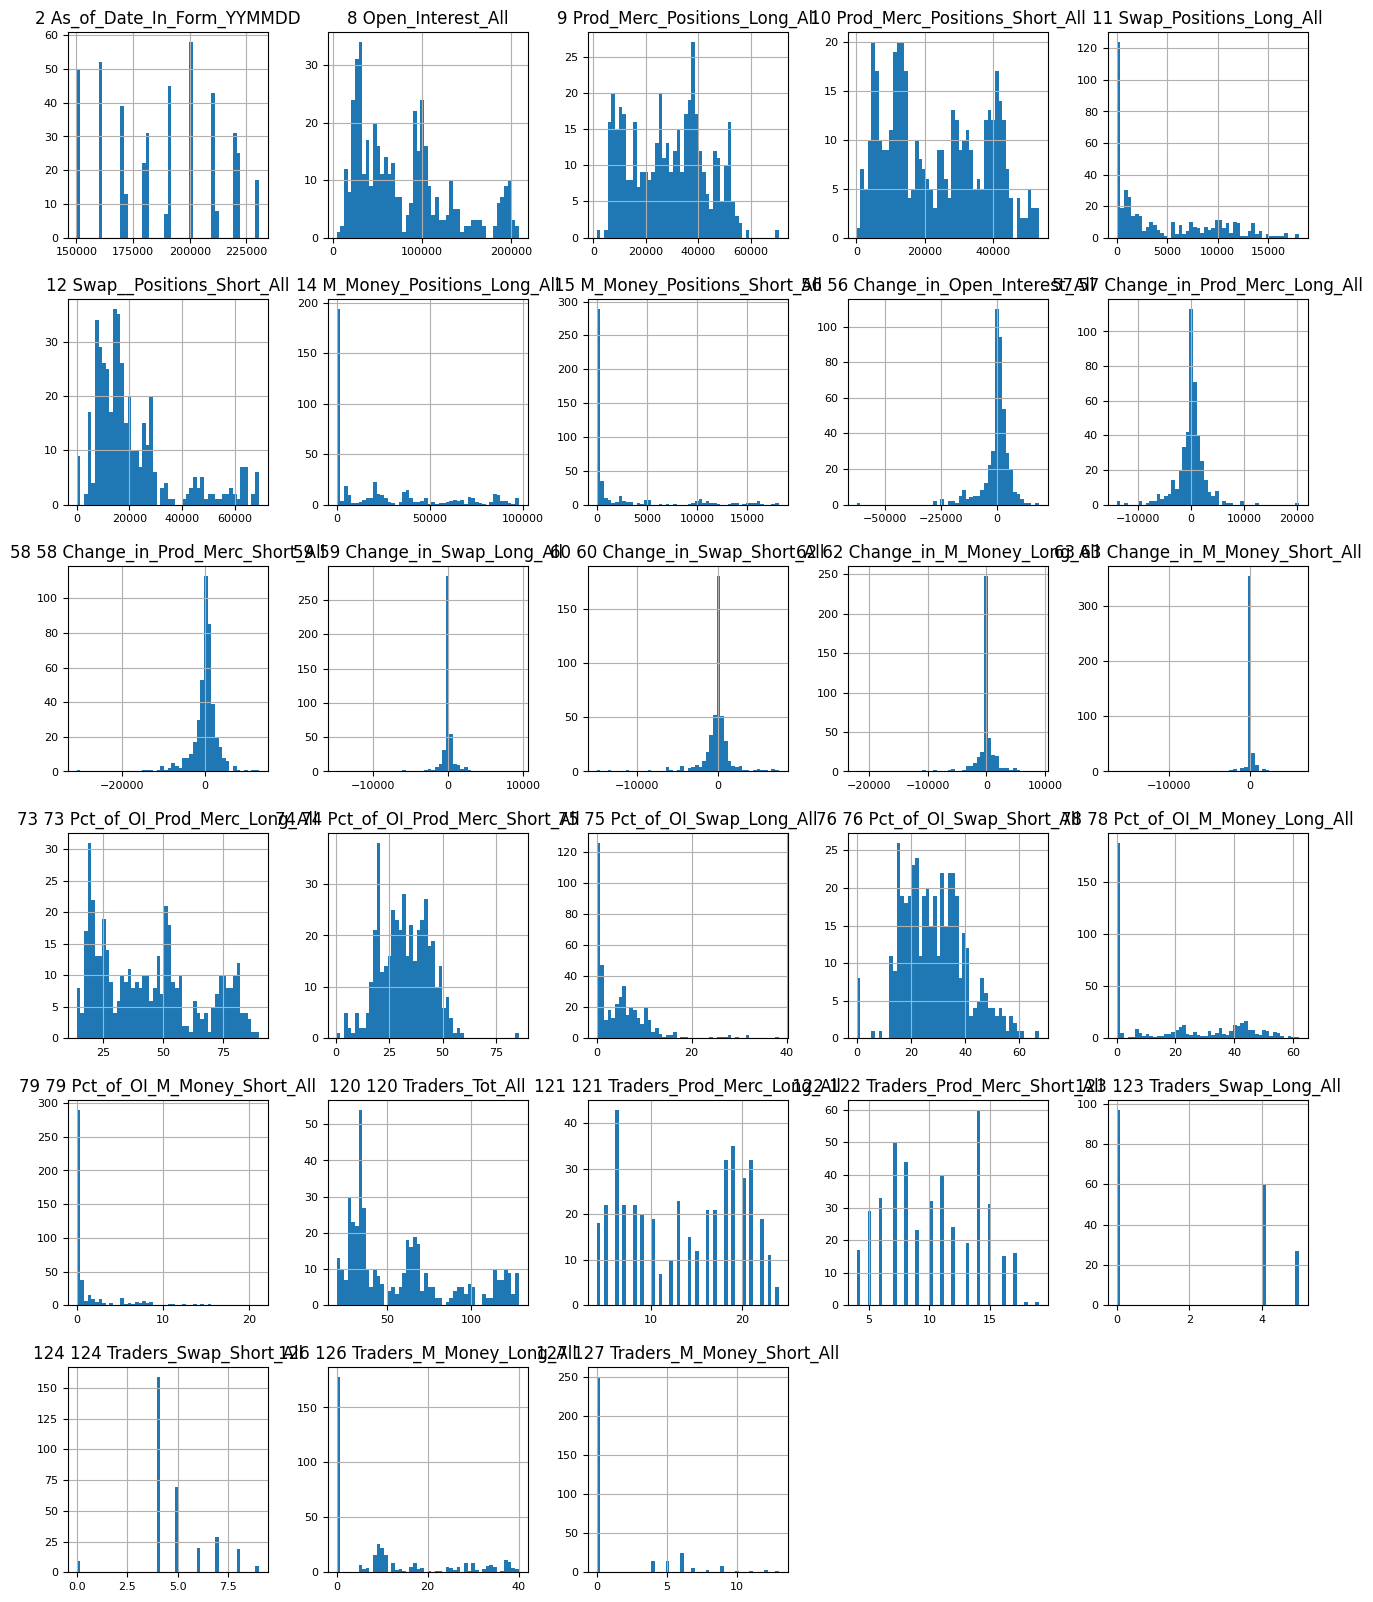

In [134]:
# Histograms: all numeric variables

df_num = df_cftc.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Duplicated rows: special treatment, for contracts from 2020 & 2021

In [135]:
#print('Nr. of duplicated rows: ', df_cftc['3 As_of_Date_Form_MM/DD/YYYY'].duplicated().sum())

# print all duplicated rows
#duplicateRowsDF = df_cftc[df_cftc['3 As_of_Date_Form_MM/DD/YYYY'].duplicated(keep=False)]
#duplicateRowsDF

In [136]:
# data preparation to merge contracts from 2020 & 2021 into single row data entries 

# prints rows with specific date value
#test = df_cftc.loc[df_cftc['3 As_of_Date_Form_MM/DD/YYYY'] == '11/23/2021']

duplicateRowsDF = df_cftc[df_cftc['3 As_of_Date_Form_MM/DD/YYYY'].duplicated(keep=False)]
special_contracts = list(duplicateRowsDF['1 Market_and_Exchange_Names'].value_counts().index)

# encode special contracts as dummy variables
dupli_dummy_df = pd.get_dummies(duplicateRowsDF['1 Market_and_Exchange_Names'])

duplicateRowsDF.drop(['1 Market_and_Exchange_Names'], axis = 1, inplace = True)
dupli_dummy_df = pd.concat([dupli_dummy_df, duplicateRowsDF], axis =1)
dupli_dummy_df = dupli_dummy_df.fillna(0)

dupli_dummy_df['3 As_of_Date_Form_MM/DD/YYYY'] = pd.to_datetime(dupli_dummy_df['3 As_of_Date_Form_MM/DD/YYYY'])
dupli_dummy_df = dupli_dummy_df.set_index('3 As_of_Date_Form_MM/DD/YYYY')
mean_agg_cols = [x for x in list(dupli_dummy_df.columns) if x not in special_contracts]
df_mean_agg = dupli_dummy_df[mean_agg_cols].resample('D').mean()
df_sum_agg = dupli_dummy_df[special_contracts].resample('D').sum()
dupli_dummy_df = pd.concat([df_mean_agg, df_sum_agg], axis=1)
dupli_dummy_df.reset_index(inplace=True)

# drop null rows
dupli_dummy_df = dupli_dummy_df.dropna()

# drop all duplicateRowsDF from df_cftc
df_cftc.drop_duplicates(subset ="3 As_of_Date_Form_MM/DD/YYYY", keep = False, inplace = True)

# concat special contracts with remaining cftc data
df_cftc = pd.concat([df_cftc, dupli_dummy_df], axis=0)

### Dummy encoding of remaining contracts

In [137]:
# find all objects (categorical variables) 
categorical_variables = list(df_cftc.select_dtypes(['object']).columns)
categorical_variables = [ x for x in categorical_variables if "Date" not in x ]
print (categorical_variables,'\n')

# object value counts
for i in range(len(categorical_variables)):
    val_counts = df_cftc[categorical_variables[i]].value_counts()
    if len(df_cftc[categorical_variables[i]].value_counts()) > 1:
        print('Col. name:', categorical_variables[i], val_counts,'\n')
    else: del df_cftc[categorical_variables[i]] # delete columns with same value all throughout

#CALIF CARBON 22 - ICE FUTURES ENERGY DIV

['1 Market_and_Exchange_Names'] 

Col. name: 1 Market_and_Exchange_Names CALIF CARBON VINTAGE 2020 - ICE FUTURES ENERGY DIV                   56
CALIF CARBON ALL VINTAGE 2018 - ICE FUTURES ENERGY DIV               53
CALIF CARBON ALL VINTAGE 2019 - ICE FUTURES ENERGY DIV               52
CALIF CARBON ALL VINTAGE 2017 - ICE FUTURES ENERGY DIV               52
CALIF CARBON ALL VINTAGE 2016 - ICE FUTURES ENERGY DIV               52
CALIF CARBON 21 - ICE FUTURES ENERGY DIV                             51
CALIFORNIA CARBON ALLOWANCE VINTAGE 2015 - ICE FUTURES ENERGY DIV    50
CALIF CARBON 22 - ICE FUTURES ENERGY DIV                             46
CALIF CARBON 23 - ICE FUTURES ENERGY DIV                              1
Name: 1 Market_and_Exchange_Names, dtype: int64 



In [138]:
# object dummy encoding

# find all remaining objects (categorical variables) 
#categorical_variables = list(df_cftc.select_dtypes(['object']).columns)

# encode objects as dummy variables
dummy_df = pd.get_dummies(df_cftc[categorical_variables])

# concatenate dummy df with df_cftc
df_cftc.drop(categorical_variables, axis = 1, inplace = True)
df_cftc = pd.concat([df_cftc, dummy_df], axis =1)

# find and remove duplicates
print('Nr. of duplicate rows: ', df_cftc.duplicated().sum())
df_cftc.drop_duplicates(inplace=True)

Nr. of duplicate rows:  0


## 4. Join all data-sets on common time-axis

In [139]:
# same datetime encoding across data-sets
#df_cftc['2 As_of_Date_In_Form_YYMMDD'] = '20' + df_cftc['2 As_of_Date_In_Form_YYMMDD'].astype(str)

def encode_datetime(df, date_name):
    df[date_name] = pd.to_datetime(df[date_name])
    #print (df[date_name][0])

    df['date'] = df[date_name].dt.strftime('%Y-%m-%d').astype(str)
    df = df.drop(date_name, 1)
    #print (df[date_name][0])
    
    return df


df_cftc = encode_datetime(df_cftc, '2 As_of_Date_In_Form_YYMMDD') # fix encoding
df_cftc = encode_datetime(df_cftc, '3 As_of_Date_Form_MM/DD/YYYY')
df_adv_auct = encode_datetime(df_adv_auct, 'AA_Date')
df_cur_auct = encode_datetime(df_cur_auct, 'CA_Date')
df_front = encode_datetime(df_front, 'Date')

In [140]:
# create new dataframe with daily date index
full_df = pd.DataFrame({'date': pd.date_range(start = '2015-06-01', end = '2022-08-02')})
full_df['date'] = full_df['date'].astype(str)

# join all data-sets
full_df = full_df.merge(df_cftc, on='date', how='left').merge(df_adv_auct, on='date', how='left')
full_df = full_df.merge(df_cur_auct, on='date', how='left').merge(df_front, on='date', how='left')

In [141]:
# find and remove duplicates
#full_df['date'].duplicated().sum()
#df_cftc.drop_duplicates(inplace=True)

In [142]:
# single entry per day
print(full_df.shape)
full_df = full_df.drop_duplicates(subset='date', keep="first")
print(full_df.shape)

(2620, 95)
(2620, 95)


## 5. Fill missing values

In [143]:
# drop categorical variables

# list(full_df.select_dtypes(['object']).columns)
drop_cols = ['CA_Revenue-Utility', 'CA_Revenue-State', 'AA_Auction', 'CA_Auction', 'AA_Revenue-Utility']
full_df.drop(drop_cols, axis = 1, inplace = True)

In [144]:
# count number of nans per column
#pd.options.display.max_rows = 4000
full_df.isna().sum()

date                                           0
8 Open_Interest_All                         2241
9 Prod_Merc_Positions_Long_All              2241
10 Prod_Merc_Positions_Short_All            2241
11 Swap_Positions_Long_All                  2241
                                            ... 
Compliance Entities Allowances Purchased    2592
Speculator Buy and Hold                     2592
Front                                        792
Benchmark                                    792
Auction Floor                                792
Length: 90, dtype: int64

In [145]:
# fill nans of categorical variables with zeros

valfil_cols = ['1 Market_and_Exchange_Names_CALIF CARBON ALL VINTAGE 2016 - ICE FUTURES ENERGY DIV',
       '1 Market_and_Exchange_Names_CALIF CARBON ALL VINTAGE 2017 - ICE FUTURES ENERGY DIV',
       '1 Market_and_Exchange_Names_CALIF CARBON ALL VINTAGE 2018 - ICE FUTURES ENERGY DIV',
       '1 Market_and_Exchange_Names_CALIF CARBON ALL VINTAGE 2019 - ICE FUTURES ENERGY DIV',
        '1 Market_and_Exchange_Names_CALIF CARBON 21 - ICE FUTURES ENERGY DIV',
        '1 Market_and_Exchange_Names_CALIF CARBON 22 - ICE FUTURES ENERGY DIV',
        #'CALIF CARBON 21 - ICE FUTURES ENERGY DIV',
       #'1 Market_and_Exchange_Names_CALIF CARBON CURRENT AUCTION - ICE FUTURES ENERGY DIV',
       '1 Market_and_Exchange_Names_CALIF CARBON VINTAGE 2020 - ICE FUTURES ENERGY DIV',
       # '1 Market_and_Exchange_Names_CALIF CARBON VINTAGE 2021 - ICE FUTURES ENERGY DIV',
       '1 Market_and_Exchange_Names_CALIFORNIA CARBON ALLOWANCE VINTAGE 2015 - ICE FUTURES ENERGY DIV',
       # 'CALIF CARBON CURRENT AUCTION - ICE FUTURES ENERGY DIV', 
       # 'CALIF CARBON VINTAGE 2021 - ICE FUTURES ENERGY DIV',
       'CALIF CARBON VINTAGE 2020 - ICE FUTURES ENERGY DIV', 'CALIF CARBON 22 - ICE FUTURES ENERGY DIV','CALIF CARBON ALLOWANCE V2022 - ICE FUTURES ENERGY DIV',
       '1 Market_and_Exchange_Names_CALIF CARBON 23 - ICE FUTURES ENERGY DIV','CALIF CARBON 23 - ICE FUTURES ENERGY DIV','CALIF CARBON CURRENT AUCTION - ICE FUTURES ENERGY DIV'
       
       
       
       ]

full_df[valfil_cols] = full_df[valfil_cols].fillna(0)

In [146]:
# fill numerical variables with previous value
bfill_cols = ['8 Open_Interest_All', '9 Prod_Merc_Positions_Long_All', '10 Prod_Merc_Positions_Short_All',
       '11 Swap_Positions_Long_All', '12 Swap__Positions_Short_All',
       '14 M_Money_Positions_Long_All', '15 M_Money_Positions_Short_All', 
       '56 56 Change_in_Open_Interest_All', '57 57 Change_in_Prod_Merc_Long_All',
       '58 58 Change_in_Prod_Merc_Short_All', '59 59 Change_in_Swap_Long_All',   
       '60 60 Change_in_Swap_Short_All', '62 62 Change_in_M_Money_Long_All', 
       '63 63 Change_in_M_Money_Short_All', '73 73 Pct_of_OI_Prod_Merc_Long_All',
       '74 74 Pct_of_OI_Prod_Merc_Short_All', '75 75 Pct_of_OI_Swap_Long_All',
       '76 76 Pct_of_OI_Swap_Short_All', '78 78 Pct_of_OI_M_Money_Long_All', 
       '79 79 Pct_of_OI_M_Money_Short_All', '120 120 Traders_Tot_All',
       '121 121 Traders_Prod_Merc_Long_All', '122 122 Traders_Prod_Merc_Short_All', 
       '123 123 Traders_Swap_Long_All', '124 124 Traders_Swap_Short_All', 
       '126 126 Traders_M_Money_Long_All', '127 127 Traders_M_Money_Short_All',
       'AA_Vintage', 'AA_Clearing Price', 'AA_Floor Price',
       'AA_Percent above Floor', 'AA_BID Ratio',
       'AA_Allowances Purchased by Compliance Entities',
       'AA_Volume of Allowances-State', 'AA_Volume of Allowances-Utility',
       'AA_Revenue-State', 'AA_Maximum', 'AA_Minimum',
       'AA_Mean', 'AA_Median', 'AA_Allowances Offered',
       'AA_Allowances Cleared', 'Qualified Bidders(Total)_x',
       'AA_Median allowance price', 'AA_Speculators Allowances Purchased',
       'AA_Vintage of Purchase', 'AA_Compliance Entities Allowances Purchased',
       'AA_Speculator Buy and Hold', 'CA_Vintage',
       'CA_Clearing Price', 'CA_Floor Price',
       'CA_Percent Above Floor', 'CA_BID Ratio', 
       'CA_Allowances Purchased by Compliance Entities',
       'CA_Volume of Allowances-State', 'CA_Volume of Allowances-Utility',
       'CA_Maximum', 'CA_Minimum',
       'CA_Mean', 'CA_Median', 'CA_Allowances Offered',
       'CA_Allowances Cleared', 'Qualified Bidders(Total)_y',
       'CA_Median allowance price', 'Speculators Allowances purchased',
       'Vintage of Purchase', 'Compliance Entities Allowances Purchased',
       'Speculator Buy and Hold', 'Front', 'Benchmark', 'Auction Floor', 
       'AA_Cleared Above Floor', 'CA_Cleared Above Floor', 'CA_HHI', 'AA_HHI']
    
full_df[bfill_cols] = full_df[bfill_cols].fillna(method='bfill')
# Harry: tricky for cftc, as it fills many years
# weighting some yrs more / less
# auction is fine for filling

full_df[bfill_cols] = full_df[bfill_cols].fillna(method='ffill')


In [147]:
#export data-set
full_df.to_csv('carbon_fill_missing_df.csv', index=False)
full_df.to_excel('carbon_fill_missing_df.xlsx', index=False)


In [148]:
#Resampling tuesdays
full_df.reset_index(inplace=True)
full_df.date = pd.to_datetime(full_df.date)
full_df = full_df.set_index('date')

# additional features - Front: Weekly min, Weekly max price
full_df['Front_Weekly_min'] = full_df['Front'].resample('W-TUE').min()
full_df['Front_Weekly_max'] = full_df['Front'].resample('W-TUE').max()
full_df[['Front_Weekly_min', 'Front_Weekly_max']] = full_df[['Front_Weekly_min', 'Front_Weekly_max']].fillna(method='bfill')
full_df[['Front_Weekly_min', 'Front_Weekly_max']] = full_df[['Front_Weekly_min', 'Front_Weekly_max']].fillna(method='ffill')

# aggregate to from daily to Weekly
mean_agg_cols = [x for x in list(full_df.columns) if x not in valfil_cols]
df_mean_agg = full_df[mean_agg_cols].resample('W-TUE').mean()
df_sum_agg = full_df[valfil_cols].resample('W-TUE').sum()

full_df_Weekly = pd.concat([df_mean_agg, df_sum_agg], axis=1)
full_df_Weekly['week_idx'] = full_df_Weekly.index.week
full_df_Weekly.reset_index(inplace=True)

# save as csv
full_df_Weekly.to_csv('carbon_subset_Weekly_df.csv', index=False)


In [149]:
# Missing values per column and data type
for i in range(len(full_df.columns)):
    nulls = full_df[full_df.columns[i]].isnull().sum()
    if nulls > 0:
        print (i)
        print(full_df.columns[i], 'Data type:', df_cftc[df_cftc.columns[i]].dtypes)   
    
if full_df.isnull().sum().sum() == 0:
    print('no nulls')


no nulls


## 6. Save and subset data 

In [150]:
#plt.figure(figsize=(12,5), dpi=100) 
#subset_df.set_index('date')['Front'].plot(label='historical price')  
#plt.title('Front')
#plt.ylim([10, 37])
#plt.legend(loc='upper left', fontsize=8)
#plt.show()

In [151]:
# # save as csv
# full_df.reset_index(inplace=True)
# full_df.to_csv('carbon_df_2022.csv', index=False)

# # subset df from June 2020
# subset_df = pd.DataFrame({'date': pd.date_range(start = '2020-06-01', end = '2022-02-08')})
# subset_df['date'] = subset_df['date'].astype(str)
# subset_df = subset_df.merge(full_df, on='date', how='left')

# # save as csv
# subset_df.reset_index(inplace=True)
# subset_df.to_csv('carbon_df_2022_subset.csv', index=False)

## 7. Feature correlations and heatmaps

In [152]:
df_num_corr = full_df.corr()['Front']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Front:\n{}".format(len(golden_features_list), golden_features_list))


There are 46 strongly correlated values with Front:
Front                                             1.000000
Benchmark                                         0.999087
Front_Weekly_max                                  0.998307
Front_Weekly_min                                  0.998109
CA_Clearing Price                                 0.979214
CA_Mean                                           0.970799
CA_Median                                         0.965819
CA_Median allowance price                         0.965807
CA_Cleared Above Floor                            0.932034
CA_Percent Above Floor                            0.922170
126 126 Traders_M_Money_Long_All                  0.916744
120 120 Traders_Tot_All                           0.897333
AA_Median                                         0.895306
AA_Clearing Price                                 0.877781
AA_Mean                                           0.875937
CA_Floor Price                                    0.870858
CA_M

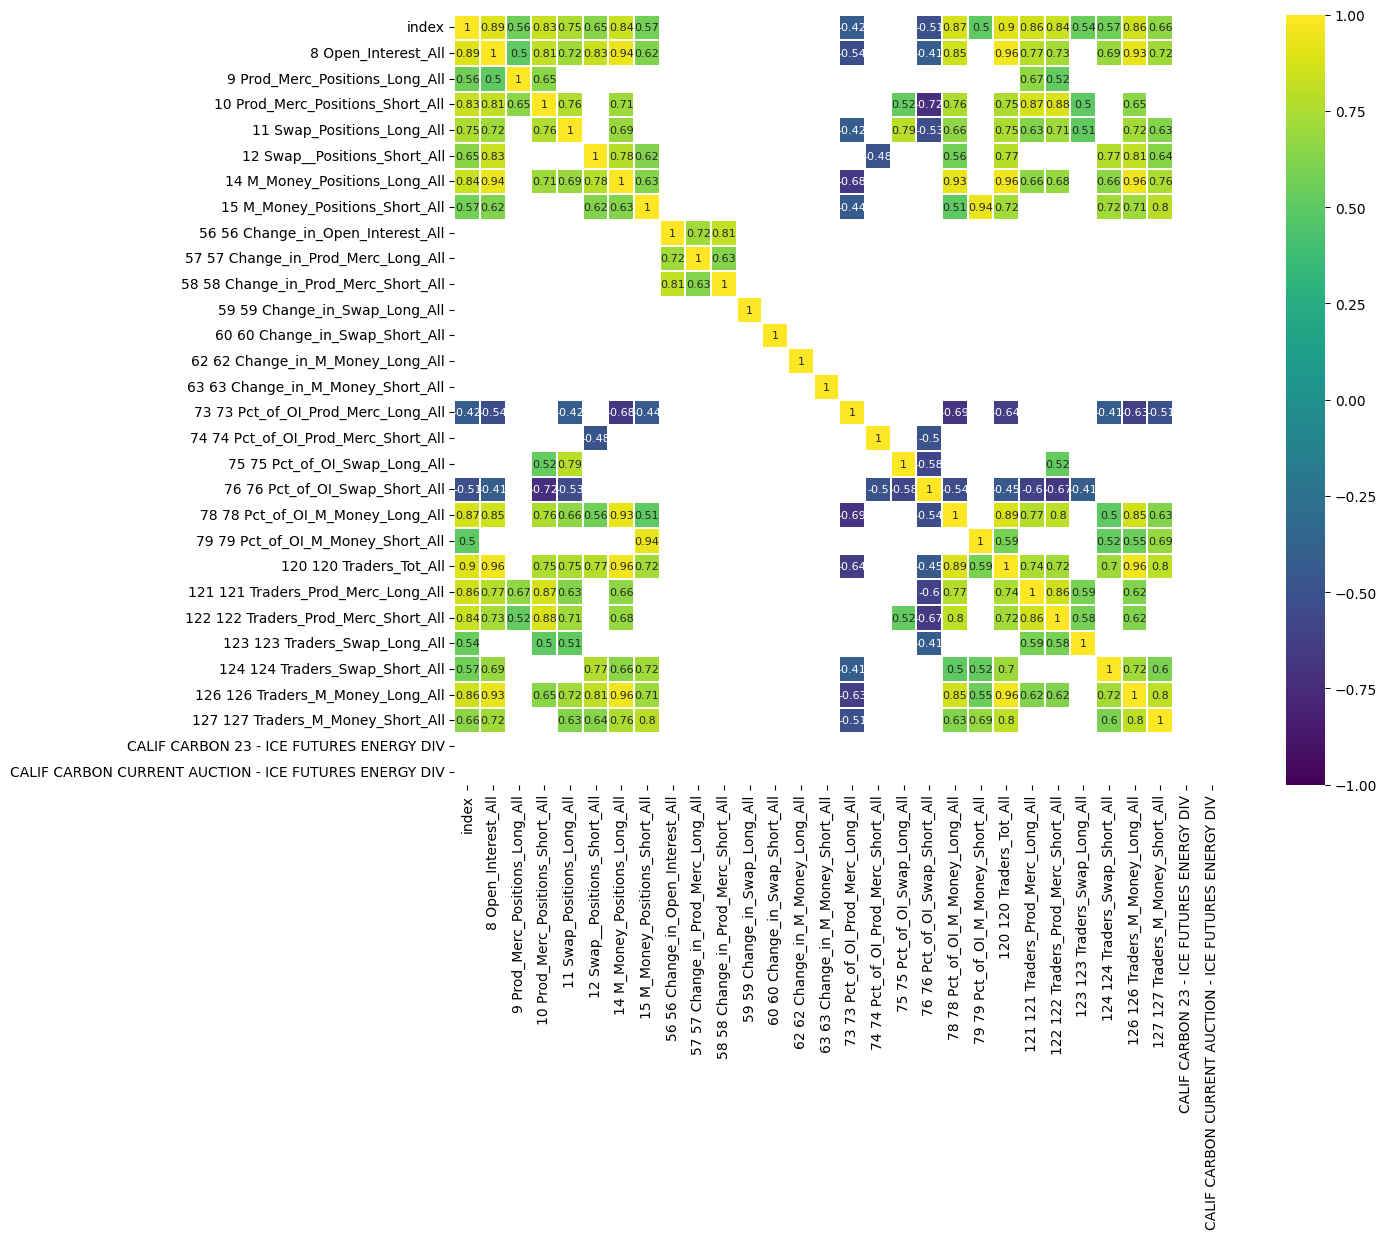

In [153]:
# correlation heatmap, examined in chunks: chunk 1
corr = full_df[full_df.columns[0:30]].corr() 
plt.figure(figsize=(16, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

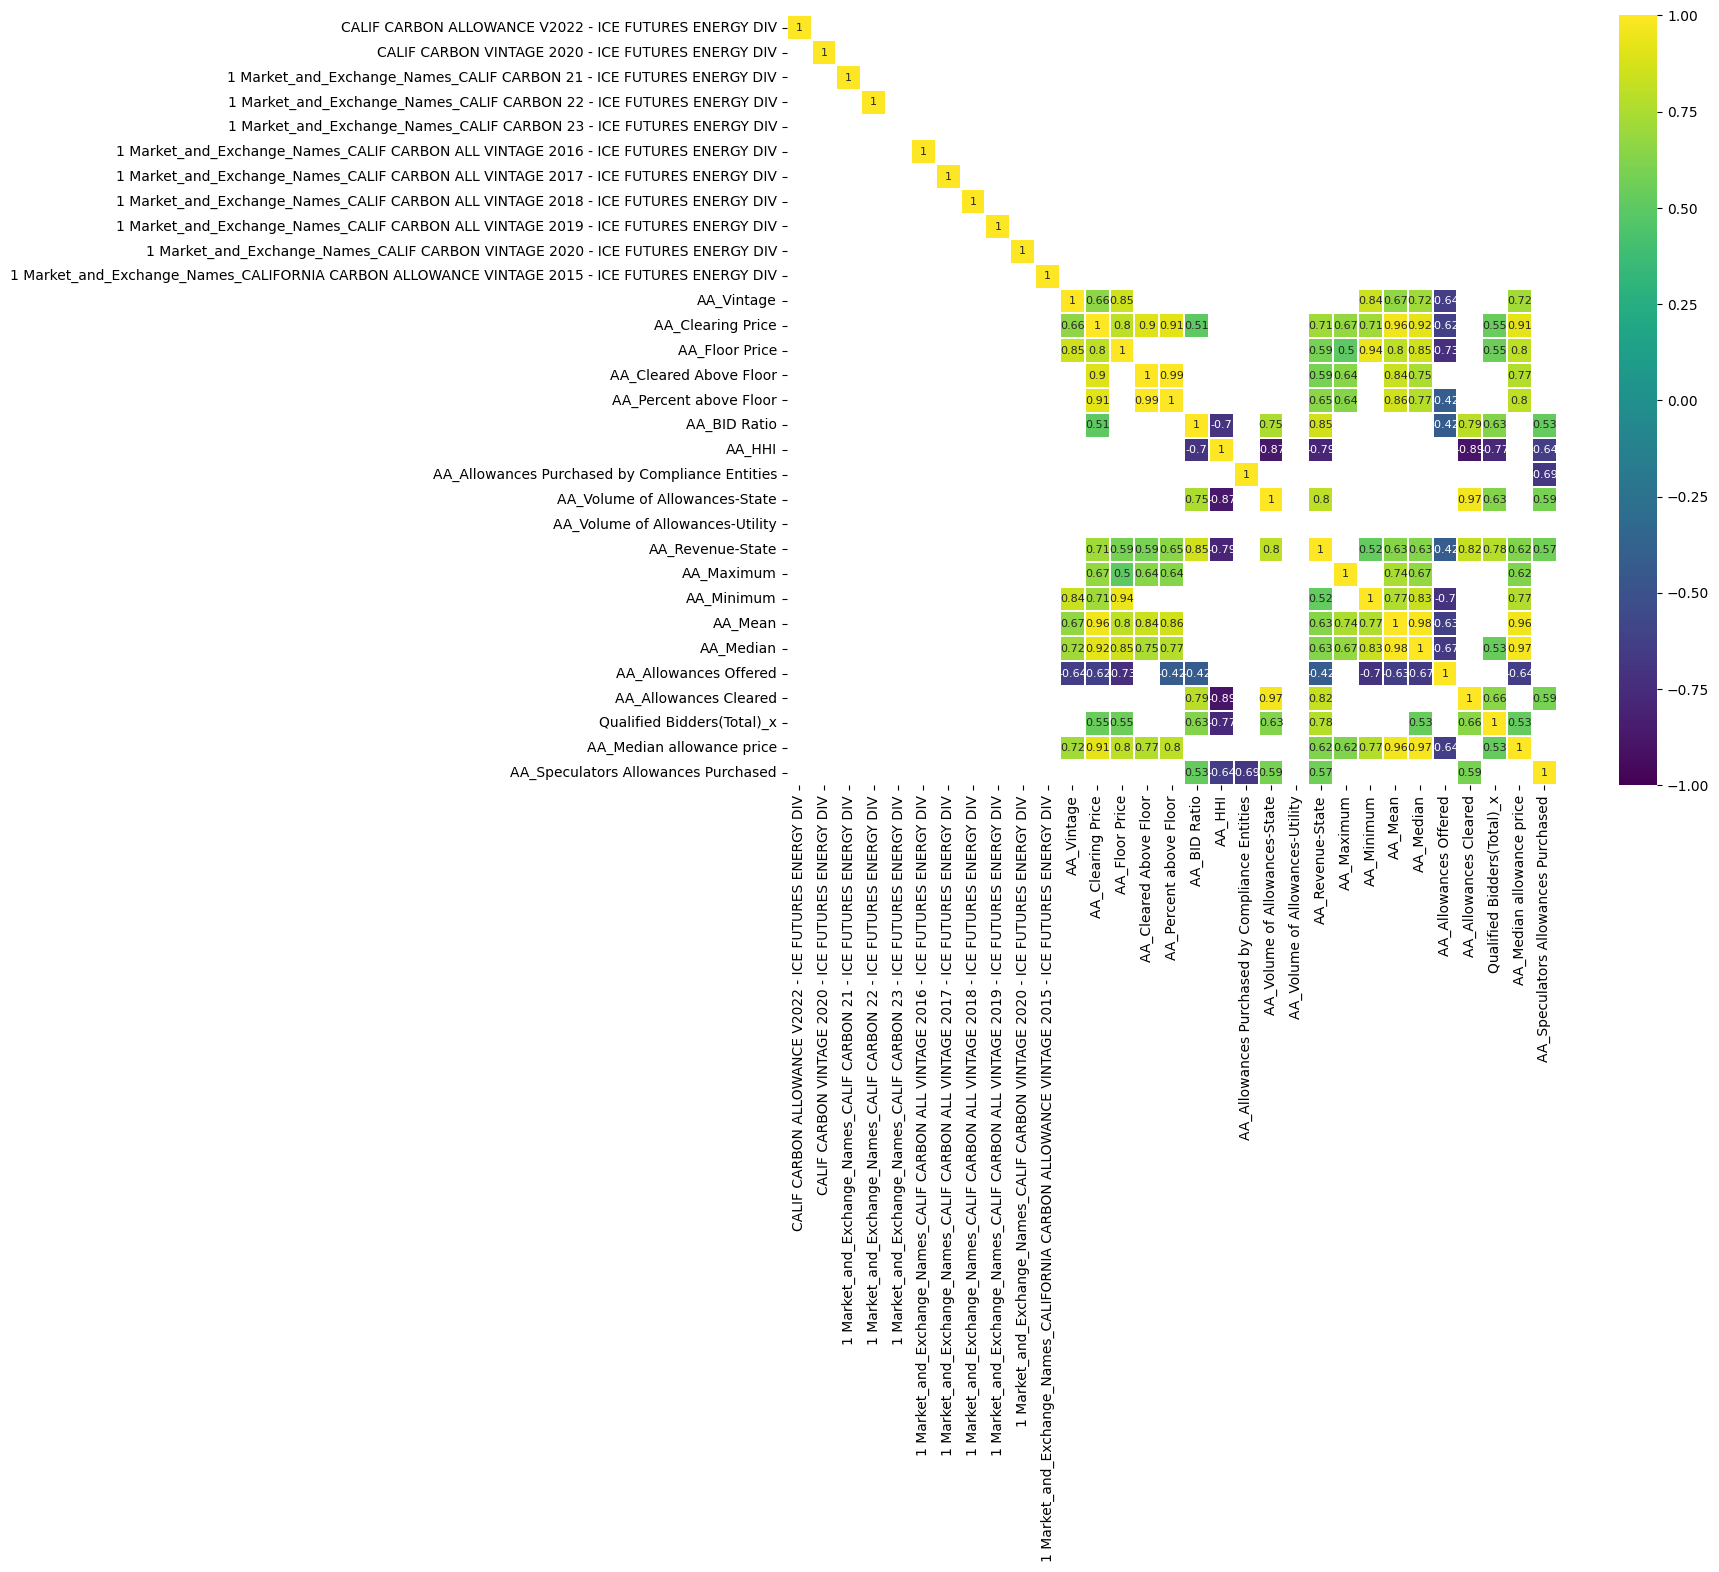

In [154]:
# correlation heatmap, examined in chunks: chunk 2
corr = full_df[full_df.columns[31:63]].corr() 
plt.figure(figsize=(16, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

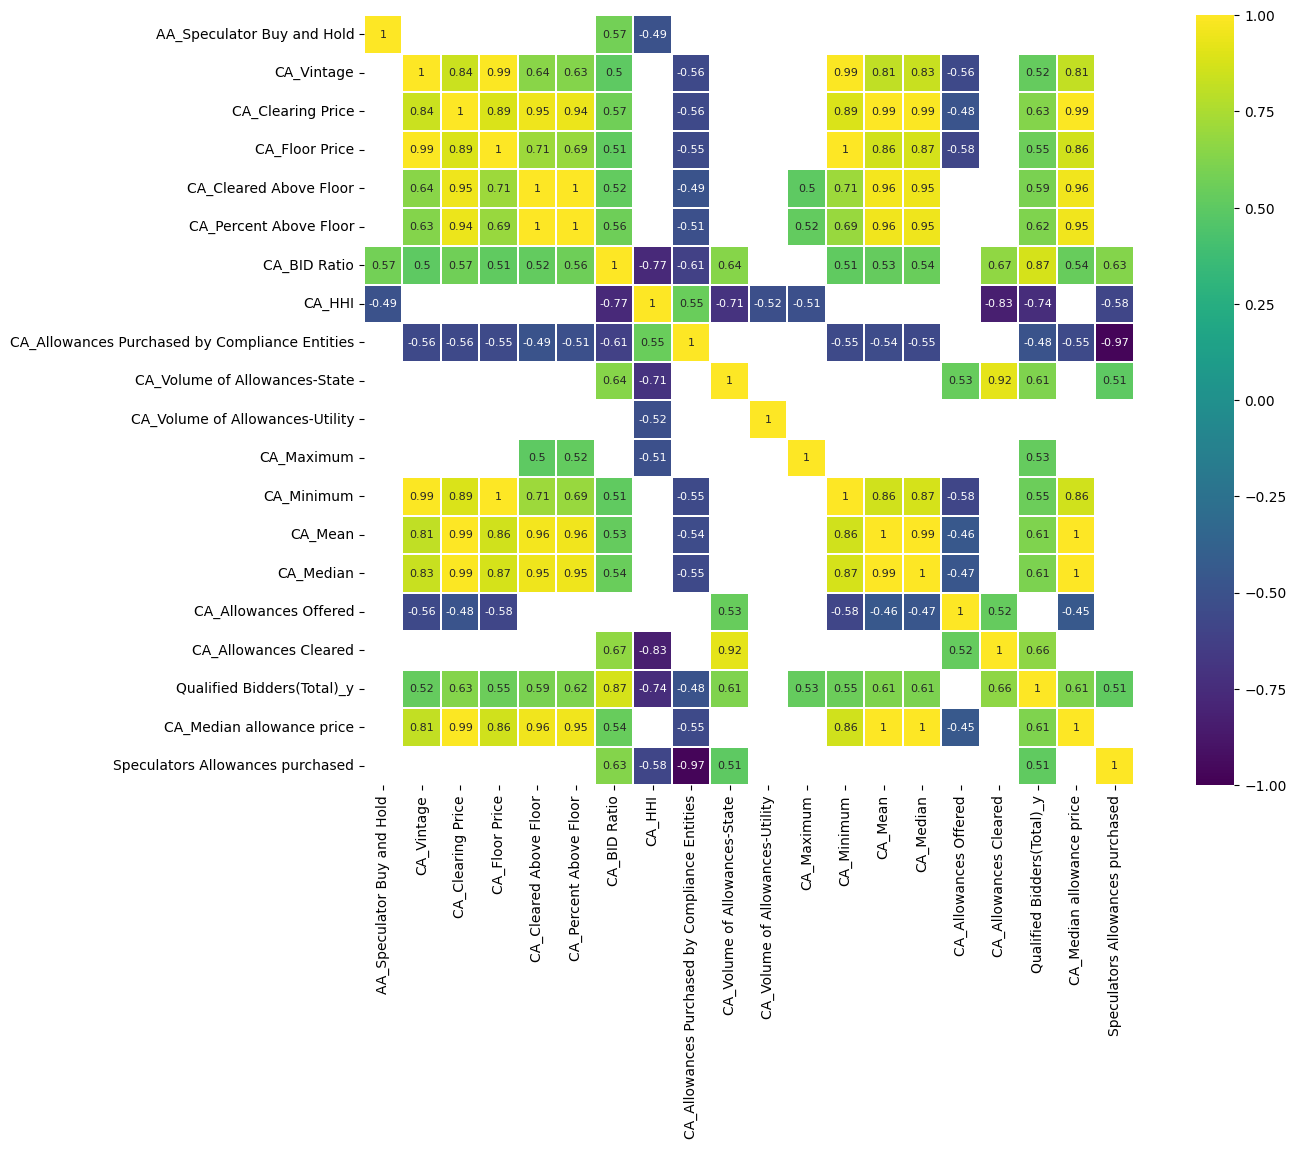

In [155]:
# correlation heatmap, examined in chunks: chunk 3
corr = full_df[full_df.columns[64:84]].corr() 
plt.figure(figsize=(16, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);